## Importando as bibliotecas

In [1]:
from pandas import read_csv
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split

import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

## Carregando o conjunto de dados

In [2]:
dados = read_csv("train.csv")

### Separando os dados

In [3]:
y = dados['label']
x = dados.drop(labels=['label'],axis=1)

### Normalizando os dados

In [4]:
x = x/255.0

### Colococando os dados na forma que a rede precisa

In [5]:
x = x.values.reshape(-1,28,28,1)
y = to_categorical(y, num_classes=10)

### Dados de treino e teste

In [6]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=.2)

## Definindo o modelo 

In [7]:
modelo = Sequential()
modelo.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
modelo.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
modelo.add(MaxPool2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
modelo.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
modelo.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
modelo.add(Dropout(0.25))
modelo.add(Flatten())
modelo.add(Dense(128, activation = "relu"))
modelo.add(Dropout(0.5))
modelo.add(Dense(10, activation = "softmax"))

### Otimizando o modelo

In [8]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

### Compilando o modelo

In [9]:
modelo.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

### Melhorando a aprendizagem do modelo

In [10]:
redutor = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

## EarlyStopping

In [11]:
parada = EarlyStopping(monitor='val_accuracy', patience=5, mode='min')

## Augmentation

In [12]:
aug = ImageDataGenerator(
        rotation_range=3,  # Gira a imagem em 3 graus
        zoom_range = 0.1, # Da um zoom na imagem de forma aleatória
        width_shift_range=0.1,  # Move a imagem de forma aleatória horizontalmente
        height_shift_range=0.1)  # Move a imagem de forma aleatória verticalmente
aug.fit(x_treino)

## ModelCheckpoint

In [13]:
check = ModelCheckpoint(filepath='melhor_modelo.h5', monitor='val_acuracy', verbose=1, save_best_model_only=True,
                        mode='min')

### Parâmetro para o treinamento

In [14]:
epochs = 100
batch_size = 64

## Executando o treinameto

In [15]:
resultado = modelo.fit(aug.flow(x_treino, y_treino, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_teste, y_teste),
                              verbose = 1, steps_per_epoch=x_treino.shape[0] // batch_size
                              , callbacks=[redutor,check])

Epoch 1/100
525/525 [==============================] - 18s 22ms/step - loss: 0.8300 - accuracy: 0.7192 - val_loss: 0.0673 - val_accuracy: 0.9804

Epoch 00001: saving model to melhor_modelo.h5
Epoch 2/100
525/525 [==============================] - 7s 13ms/step - loss: 0.1529 - accuracy: 0.9569 - val_loss: 0.0544 - val_accuracy: 0.9844

Epoch 00002: saving model to melhor_modelo.h5
Epoch 3/100
525/525 [==============================] - 7s 14ms/step - loss: 0.1010 - accuracy: 0.9699 - val_loss: 0.0451 - val_accuracy: 0.9869

Epoch 00003: saving model to melhor_modelo.h5
Epoch 4/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0891 - accuracy: 0.9738 - val_loss: 0.0619 - val_accuracy: 0.9852

Epoch 00004: saving model to melhor_modelo.h5
Epoch 5/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0838 - accuracy: 0.9746 - val_loss: 0.0394 - val_accuracy: 0.9895

Epoch 00005: saving model to melhor_modelo.h5
Epoch 6/100
525/525 [=======================

525/525 [==============================] - 7s 13ms/step - loss: 0.0316 - accuracy: 0.9916 - val_loss: 0.0374 - val_accuracy: 0.9926

Epoch 00041: saving model to melhor_modelo.h5
Epoch 42/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0369 - val_accuracy: 0.9931

Epoch 00042: saving model to melhor_modelo.h5
Epoch 43/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0307 - accuracy: 0.9919 - val_loss: 0.0371 - val_accuracy: 0.9930

Epoch 00043: saving model to melhor_modelo.h5
Epoch 44/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0311 - accuracy: 0.9912 - val_loss: 0.0369 - val_accuracy: 0.9929

Epoch 00044: saving model to melhor_modelo.h5
Epoch 45/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0341 - accuracy: 0.9905 - val_loss: 0.0366 - val_accuracy: 0.9924

Epoch 00045: saving model to melhor_modelo.h5
Epoch 46/100
525/525 [==============================]


Epoch 00083: saving model to melhor_modelo.h5
Epoch 84/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0339 - accuracy: 0.9917 - val_loss: 0.0358 - val_accuracy: 0.9930

Epoch 00084: saving model to melhor_modelo.h5
Epoch 85/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0294 - accuracy: 0.9918 - val_loss: 0.0364 - val_accuracy: 0.9932

Epoch 00085: saving model to melhor_modelo.h5
Epoch 86/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0302 - accuracy: 0.9915 - val_loss: 0.0364 - val_accuracy: 0.9933

Epoch 00086: saving model to melhor_modelo.h5
Epoch 87/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0301 - accuracy: 0.9915 - val_loss: 0.0360 - val_accuracy: 0.9931

Epoch 00087: saving model to melhor_modelo.h5
Epoch 88/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0377 - val_accuracy: 0.9929

Epoch 00088: saving model to melhor_mod

## Visualizando os resultados

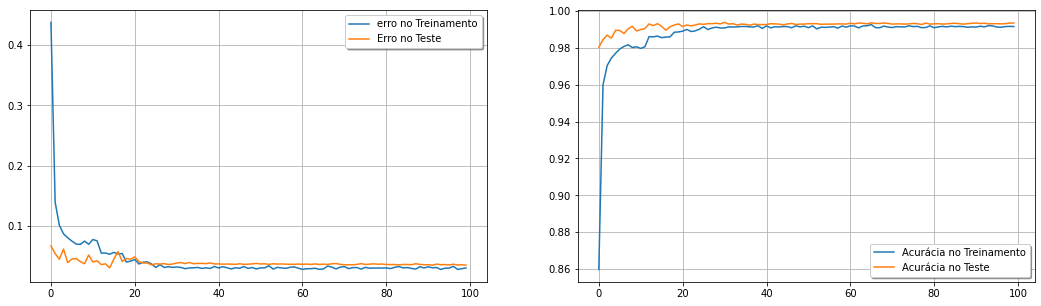

In [16]:
fig, ax = plt.subplots(1,2, figsize=(18,5))
ax[0].plot(resultado.history['loss'], label='erro no Treinamento')
ax[0].plot(resultado.history['val_loss'], label='Erro no Teste')
ax[0].grid()
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(resultado.history['accuracy'], label='Acurácia no Treinamento')
ax[1].plot(resultado.history['val_accuracy'], label='Acurácia no Teste')
ax[1].grid()
ledend = ax[1].legend(loc='best', shadow=True)